In [ ]:
#201904192 ICT공학부 김성중

# '에코프로'라는 주식은 '에코프로','에코프로비엠'과 '에코프로에이치엔'으로 나뉘는데, 한 주가가 올라가게 되면, 다른 주가도 올라가는지, 내려가는지 확인하려고 한다. 

In [105]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [106]:
#데이터불러오기
investBM=pd.read_csv('ecoprobm.csv',parse_dates =["Date"]).set_index('Date').sort_index()
investHN=pd.read_csv('ecoprohn.csv',parse_dates =["Date"]).set_index('Date').sort_index()
investpro=pd.read_csv('ecopro.csv',parse_dates =["Date"]).set_index('Date').sort_index()

In [107]:
#데이터 확인
investBM.info()
investHN.info()
investpro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2021-05-31 to 2023-06-09
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     604 non-null    int64  
 1   Open      604 non-null    int64  
 2   High      604 non-null    int64  
 3   Low       604 non-null    int64  
 4   Vol.      604 non-null    int64  
 5   Change %  604 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 33.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 566 entries, 2021-05-31 to 2023-06-09
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     566 non-null    int64  
 1   Open      566 non-null    int64  
 2   High      566 non-null    int64  
 3   Low       566 non-null    int64  
 4   Vol.      566 non-null    int64  
 5   Change %  566 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 31.0 KB
<class 'pandas.core.frame.Da

In [108]:
#데이터 컬럼명 지정하고 바꿔주기
col_map_BM = {'Date' : 'Date_BM',
       'Price' : 'Price_BM',
       'Open' : 'Open_BM',
       'High' : 'High_BM',
       'Low' : 'Low_BM',
       'Vol.' : 'Vol._BM',
       'Change %' : 'Change %_BM'}
col_map_HN = {'Date' : 'Date_HN',
       'Price' : 'Price_HN',
       'Open' : 'Open_HN',
       'High' : 'High_HN',
       'Low' : 'Low_HN',
       'Vol.' : 'Vol._HN',
       'Change %' : 'Change %_HN'}
col_map_pro = {'Date' : 'Date_pro',
       'Price' : 'Price_pro',
       'Open' : 'Open_pro',
       'High' : 'High_pro',
       'Low' : 'Low_pro',
       'Vol.' : 'Vol._pro',
       'Change %' : 'Change %_pro'}

investBM= investBM.rename(columns=col_map_BM)
investHN= investHN.rename(columns=col_map_HN)
investpro= investpro.rename(columns=col_map_pro)


In [109]:
investBM.info()
investHN.info()
investpro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2021-05-31 to 2023-06-09
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price_BM     604 non-null    int64  
 1   Open_BM      604 non-null    int64  
 2   High_BM      604 non-null    int64  
 3   Low_BM       604 non-null    int64  
 4   Vol._BM      604 non-null    int64  
 5   Change %_BM  604 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 33.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 566 entries, 2021-05-31 to 2023-06-09
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price_HN     566 non-null    int64  
 1   Open_HN      566 non-null    int64  
 2   High_HN      566 non-null    int64  
 3   Low_HN       566 non-null    int64  
 4   Vol._HN      566 non-null    int64  
 5   Change %_HN  566 non-null    float64
dtypes: float64(1), int64(5)
me

In [113]:
#데이터프레임 합치기
invest = pd.concat([investHN,investBM,investpro],axis=1)

In [114]:
invest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 609 entries, 2021-05-31 to 2023-06-09
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price_HN      566 non-null    float64
 1   Open_HN       566 non-null    float64
 2   High_HN       566 non-null    float64
 3   Low_HN        566 non-null    float64
 4   Vol._HN       566 non-null    float64
 5   Change %_HN   566 non-null    float64
 6   Price_BM      604 non-null    float64
 7   Open_BM       604 non-null    float64
 8   High_BM       604 non-null    float64
 9   Low_BM        604 non-null    float64
 10  Vol._BM       604 non-null    float64
 11  Change %_BM   604 non-null    float64
 12  Price_pro     599 non-null    float64
 13  Open_pro      599 non-null    float64
 14  High_pro      599 non-null    float64
 15  Low_pro       599 non-null    float64
 16  Vol._pro      597 non-null    float64
 17  Change %_pro  599 non-null    float64
dtypes: float64(

In [115]:
#결측값 확인 
invest.isna().sum()

Price_HN        43
Open_HN         43
High_HN         43
Low_HN          43
Vol._HN         43
Change %_HN     43
Price_BM         5
Open_BM          5
High_BM          5
Low_BM           5
Vol._BM          5
Change %_BM      5
Price_pro       10
Open_pro        10
High_pro        10
Low_pro         10
Vol._pro        12
Change %_pro    10
dtype: int64

In [116]:
#결측값 삭제
invest = invest.dropna()

In [117]:
#결측값 확인
invest.isna().sum()

Price_HN        0
Open_HN         0
High_HN         0
Low_HN          0
Vol._HN         0
Change %_HN     0
Price_BM        0
Open_BM         0
High_BM         0
Low_BM          0
Vol._BM         0
Change %_BM     0
Price_pro       0
Open_pro        0
High_pro        0
Low_pro         0
Vol._pro        0
Change %_pro    0
dtype: int64

In [120]:
# 열확인
invest.columns

Index(['Price_HN', 'Open_HN', 'High_HN', 'Low_HN', 'Vol._HN', 'Change %_HN',
       'Price_BM', 'Open_BM', 'High_BM', 'Low_BM', 'Vol._BM', 'Change %_BM',
       'Price_pro', 'Open_pro', 'High_pro', 'Low_pro', 'Vol._pro',
       'Change %_pro'],
      dtype='object')

In [131]:
#
(
invest
.resample('Q')
[['Price_BM','Price_HN','Price_pro','Vol._BM','Vol._HN','Vol._pro', 'Change %_BM','Change %_HN','Change %_pro']]
.sum()
)

,Price_BM,Price_HN,Price_pro,Vol._BM,Vol._HN,Vol._pro,Change %_BM,Change %_HN,Change %_pro
Date,,,,,,,,,
2021-06-30,1101209.0,852025.0,990482.0,14031360.0,9707930.0,8717930.0,-3.5808,-0.0154,-0.2941
2021-09-30,8300888.0,7179000.0,5767801.0,79973780.0,66402760.0,29637620.0,22.2093,2.3433,0.8012
2021-12-31,12963186.0,6945200.0,8252145.0,38286860.0,13945550.0,38899780.0,24.8253,-0.2278,0.1860
2022-03-31,7358378.0,3596100.0,5395085.0,47336720.0,13439390.0,27692880.0,6.1527,-0.2529,-0.3748
2022-06-30,9330280.0,3090250.0,5373402.0,39656840.0,6564390.0,36296520.0,2.6726,-0.3123,-0.4064
2022-09-30,7739400.0,3480700.0,7103622.0,44291320.0,4711930.0,30616800.0,-0.2225,0.3268,0.4033
2022-12-31,7058700.0,3499300.0,8354678.0,35498930.0,11078090.0,29107480.0,0.0698,-0.0841,-0.2568
2023-03-31,10403300.0,3969700.0,16841500.0,24186210.0,5531170.0,36709030.0,0.9574,0.6220,1.7055
2023-06-30,14217500.0,3795600.0,33493000.0,12024940.0,8740810.0,14176030.0,0.2117,-0.0793,0.4052


<AxesSubplot:title={'center':'invest'}, xlabel='Date'>

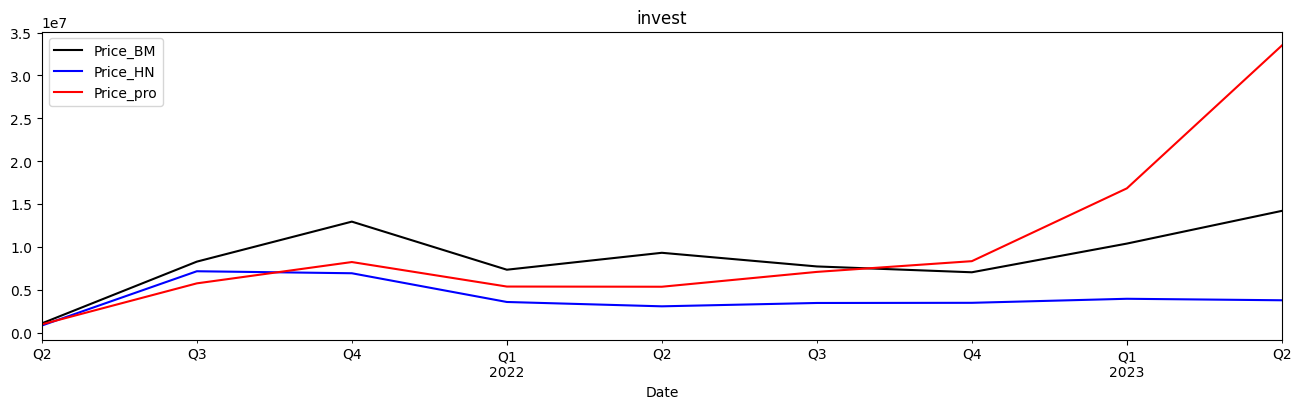

In [121]:
#BM과 HN의 가격 차이 
fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['Price_BM','Price_HN','Price_pro']]
    .sum()
    .plot(color=['black','blue','red'],ax=ax, title='invest')
)

<AxesSubplot:title={'center':'invest'}, xlabel='Date'>

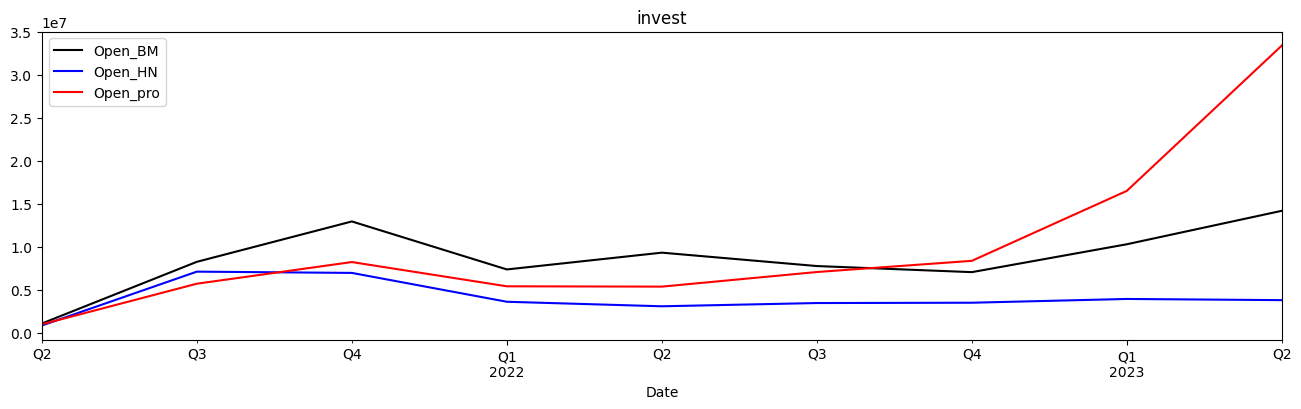

In [124]:
#BM과 HN의 시장가 차이 
fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['Open_BM','Open_HN','Open_pro']]
    .sum()
    .plot(color=['black','blue','red'],ax=ax, title='invest')
)

<AxesSubplot:title={'center':'invest'}, xlabel='Date'>

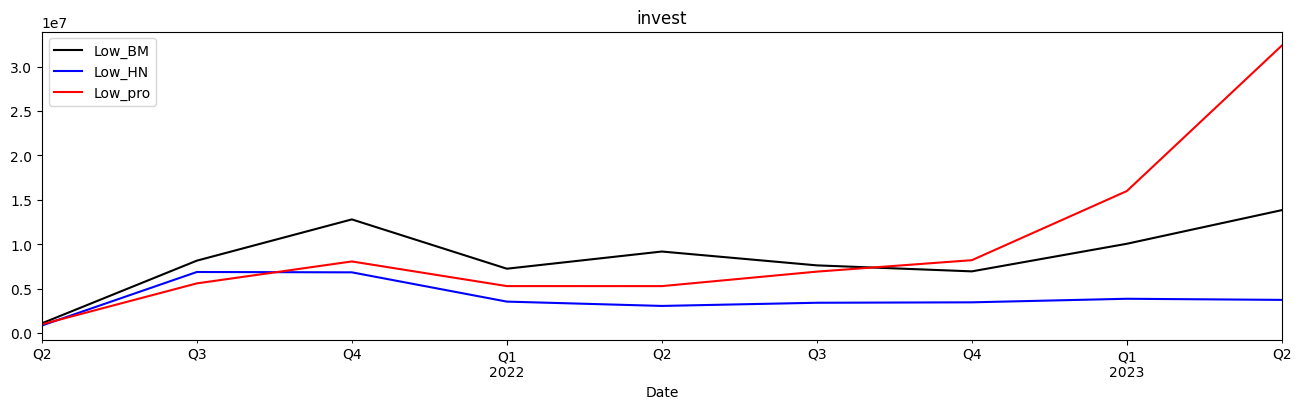

In [125]:
#BM과 HN의 저가 차이 
fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['Low_BM','Low_HN','Low_pro']]
    .sum()
    .plot(color=['black','blue','red'],ax=ax, title='invest')
)

<AxesSubplot:title={'center':'invest'}, xlabel='Date'>

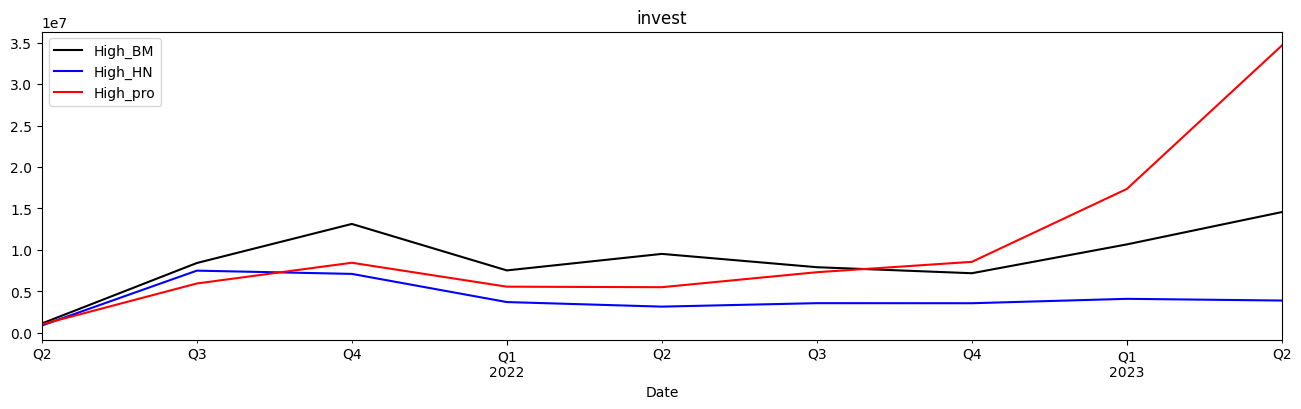

In [126]:
#BM과 HN의 고가 차이 
fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['High_BM','High_HN','High_pro']]
    .sum()
    .plot(color=['black','blue','red'],ax=ax, title='invest')
)

<AxesSubplot:title={'center':'invest'}, xlabel='Date'>

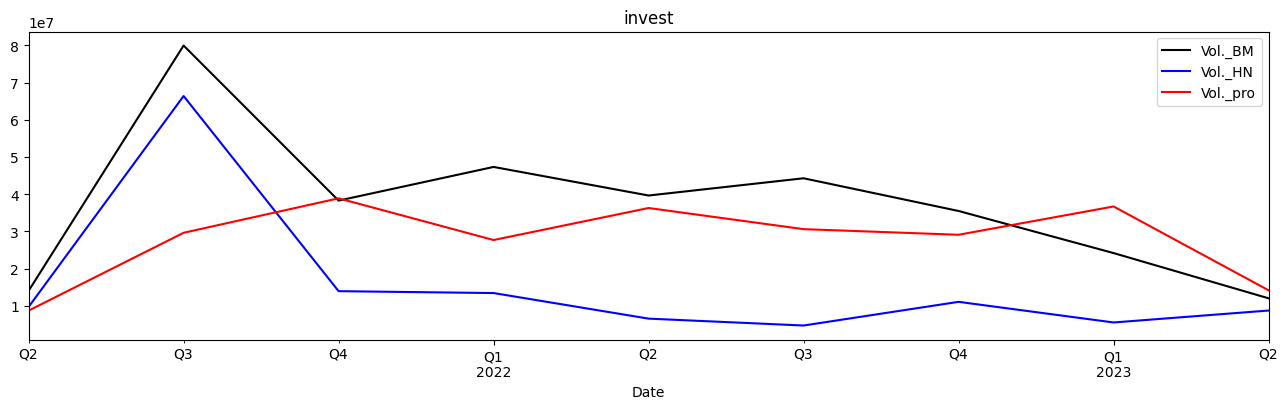

In [127]:
#BM과 HN의 거래량 차이 
fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['Vol._BM','Vol._HN','Vol._pro']]
    .sum()
    .plot(color=['black','blue','red'],ax=ax, title='invest')
)

# 거래량은 에코프로비엠 > 에코프로 > 에코프로에이치앤 순으로 많은 것을 볼 수 있다.
# 2021 2분기~3분기까지는 전부 올라가는 추세였지만 이후에는 다르게 변동

<AxesSubplot:title={'center':'invest'}, xlabel='Date'>

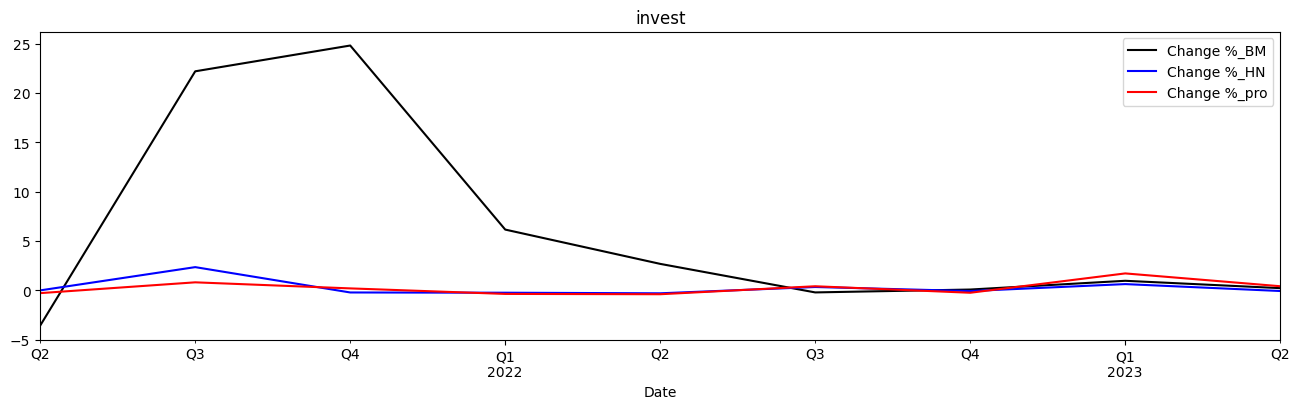

In [128]:
#BM과 HN의 변동량 차이 
fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['Change %_BM','Change %_HN','Change %_pro']]
    .sum()
    .plot(color=['black','blue','red'],ax=ax, title='invest')
)

<AxesSubplot:xlabel='Date'>

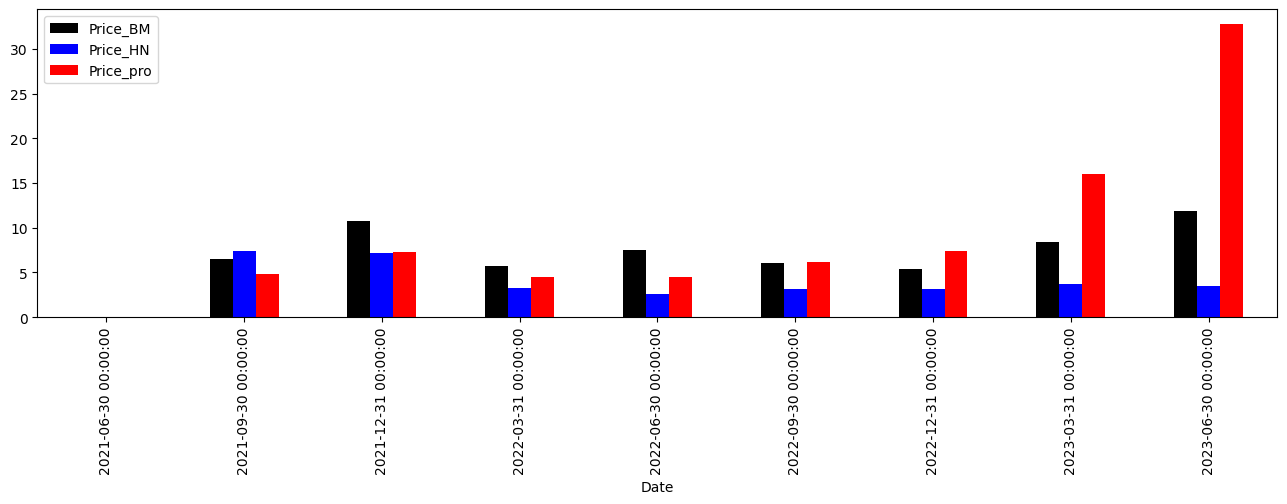

In [140]:
#BM과 HN의 가격 차이 
invest_begin=(
    invest.resample('Q')
    [['Price_BM','Price_HN','Price_pro']]
    .sum()
    .iloc[0]
)

fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['Price_BM','Price_HN','Price_pro']]
    .sum()
    .div(invest_begin)
    .sub(1)
    .round(2)
    .plot.bar(color=['black','blue','red'],ax=ax)
)

<AxesSubplot:xlabel='Date'>

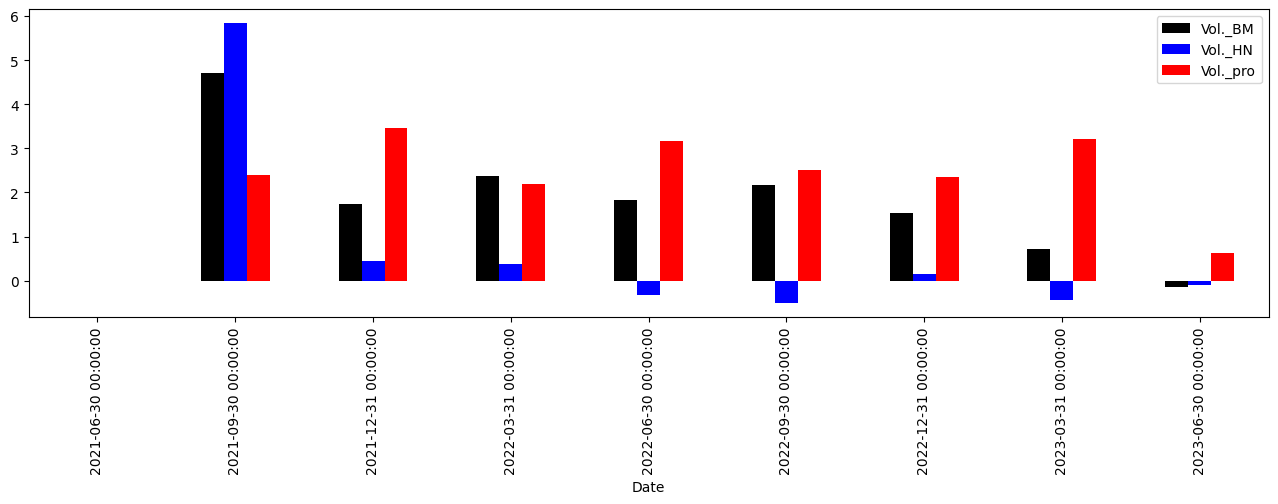

In [130]:
#BM과 HN의 거래량 차이 
invest_begin=(
    invest.resample('Q')
    [['Vol._BM','Vol._HN','Vol._pro']]
    .sum()
    .iloc[0]
)

fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['Vol._BM','Vol._HN','Vol._pro']]
    .sum()
    .div(invest_begin)
    .sub(1)
    .round(2)
    .plot.bar(color=['black','blue','red'],ax=ax)
)

<AxesSubplot:xlabel='Date'>

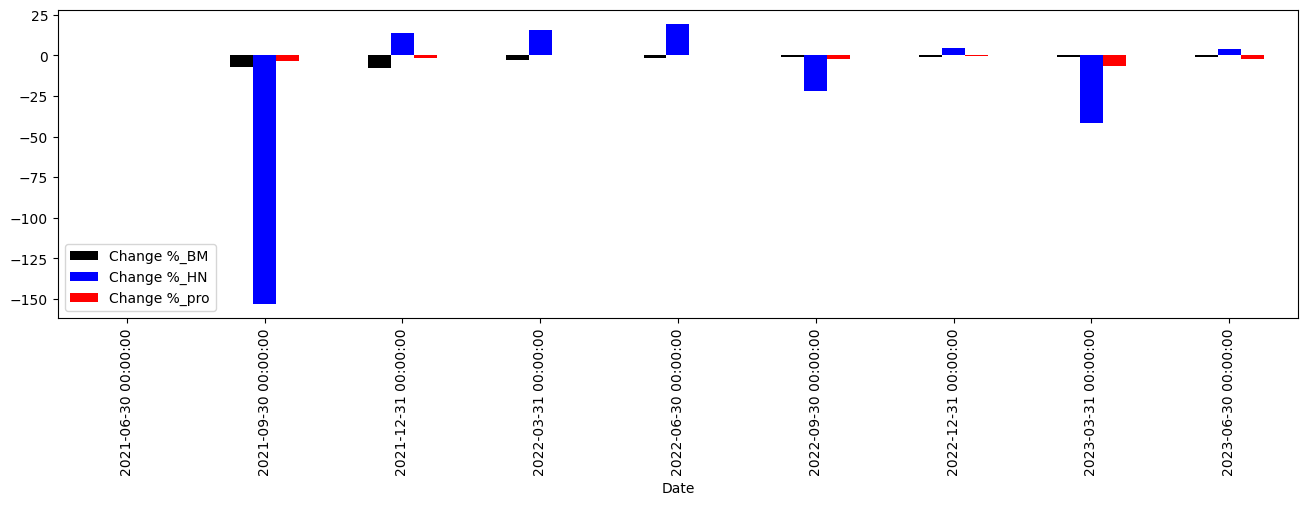

In [129]:
#BM과 HN의 변동량 차이 
invest_begin=(
    invest.resample('Q')
    [['Change %_BM','Change %_HN','Change %_pro']]
    .sum()
    .iloc[0]
)

fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['Change %_BM','Change %_HN','Change %_pro']]
    .sum()
    .div(invest_begin)
    .sub(1)
    .round(2)
    .plot.bar(color=['black','blue','red'],ax=ax)
)

In [ ]:

#시계열분석을 통해서 시각화를 진행한 결과
#에코프로와 에코프로비엠, 에코프로에이치엔은 2022년 1분기까지는 비례했지만
#이후부터는 에코프로에이치엔은 가격이 관련이 없다는 것을 알 수 있다. 

#변동량 그래프에서는 결과값이 이상하게 나오곤했는데, 이부분은 주가가 오를떄는 적지만, 변동폭이 높고, 주가가 떨어질때는 많지만, 변동폭이 적어서 나온다고 판단했다.

# 에코프로계열중에 선택해야할 주가는 거래량이 많은 쪽을 선택하는것이 좋다고 볼 수 있다. 

#아쉬운점 
#주가변동이라는 것이 물론 다른 주가의 변동에 따라서 같이 움직이는 것 이지만 코로나처럼 자연재해등에 영향을 받기 때문에 예측하기 어렵다는 것이 한계점이였다. 